In [2]:
# for basic operations
import numpy as np
import pandas as pd

# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for providing the path
# import os
# print(os.listdir('C:/Users/muril/Documents/UNLV - MIS/MIS 753 - Independent Study/Amazon Alexa/'))

In [3]:
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t', quoting = 3)

# getting the shape of the data
data.shape

(3150, 5)

In [4]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
# describing the data set
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
# checking if there are any null values in the dataset
data.isnull().any().any()

False

In [7]:
# adding a length column for analyzing the length of the reviews
data['length'] = data['verified_reviews'].apply(len)
data.groupby('length').describe().sample(10)

rating                                                feedback  \
        count      mean       std  min   25%  50%   75%  max    count   
length                                                                  
155       9.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      9.0   
336       2.0  4.500000  0.707107  4.0  4.25  4.5  4.75  5.0      2.0   
938       1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0      1.0   
88       11.0  4.272727  1.190874  1.0  4.00  5.0  5.00  5.0     11.0   
360       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0      1.0   
418       2.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      2.0   
320       2.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      2.0   
84       18.0  4.888889  0.323381  4.0  5.00  5.0  5.00  5.0     18.0   
94        8.0  4.625000  1.060660  2.0  5.00  5.0  5.00  5.0      8.0   
686       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0      1.0   

                                                     
            mean       std  min  25%  50%  75%  max  
length                                               
155     1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
336     1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
938     0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
88      0.909091  0.301511  0.0  1.0  1.0  1.0  1.0  
360     1.000000       NaN  1.0  1.0  1.0  1.0  1.0  
418     1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
320     1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
84      1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
94      0.875000  0.353553  0.0  1.0  1.0  1.0  1.0  
686     1.000000       NaN  1.0  1.0  1.0  1.0  1.0

In [8]:
data.groupby('rating').describe()

feedback                                     length              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.658385   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  250.020833   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  208.098684   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  179.338462   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  109.006562   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.928219  1.0  36.00  120.0  284.00  1126.0  
2       270.179472  1.0  78.75  165.0  311.25  1688.0  
3       272.582517  1.0  54.00  131.0  286.00  1956.0  
4       216.415268  1.0  34.50  100.0  242.00  1362.0  
5       152.505019  1.0  27.00   65.0  136.00  2853.0

In [9]:
data.groupby('feedback').describe()

rating                                               length  \
           count      mean       std  min  25%  50%  75%  max   count   
feedback                                                                
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0   257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0  2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.964981  236.895519  1.0  53.0  137.0  291.0  1688.0  
1         125.274456  175.036515  1.0  29.0   70.0  155.0  2853.0

In [10]:
ratings = data['rating'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df = [rating_piechart]

layout = go.Layout(
           title = 'Distribution of Ratings for Alexa')

fig = go.Figure(data = df,
                 layout = layout)

py.iplot(fig)

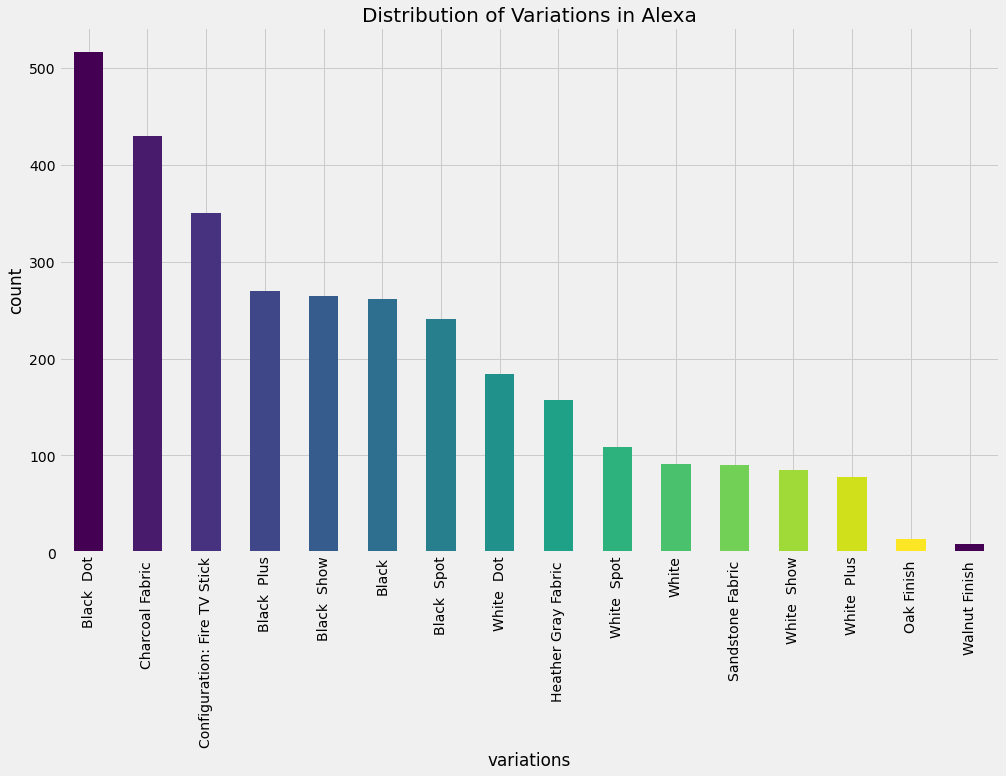

In [11]:
color = plt.cm.viridis(np.linspace(0, 1, 15))
data['variation'].value_counts().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of Variations in Alexa', fontsize = 20)
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

In [12]:
feedbacks = data['feedback'].value_counts()
label_feedback = feedbacks.index
size_feedback = feedbacks.values
colors = ['darkblue', 'aqua']

feedback_piechart = go.Pie(labels = label_feedback,
                         values = size_feedback,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df2 = [feedback_piechart]
layout = go.Layout(
           title = 'Distribution of Feedbacks for Alexa')
fig = go.Figure(data = df2,
                 layout = layout)
py.iplot(fig)

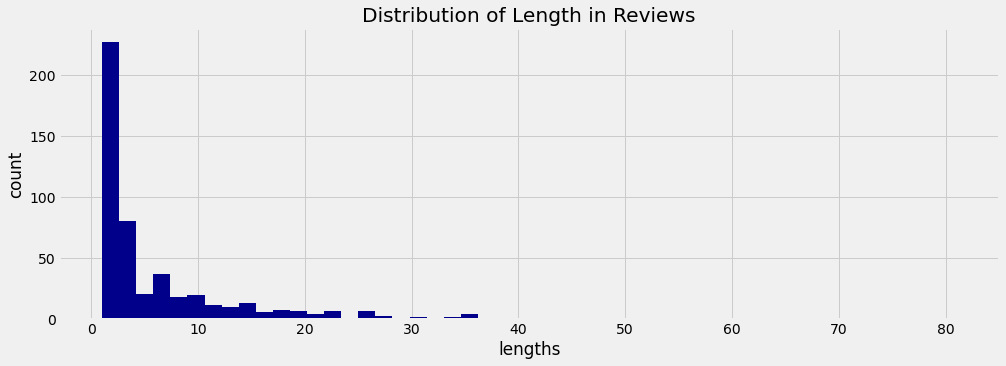

In [13]:
data['length'].value_counts().plot.hist(color = 'darkblue', figsize = (15, 5), bins = 50)
plt.title('Distribution of Length in Reviews')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

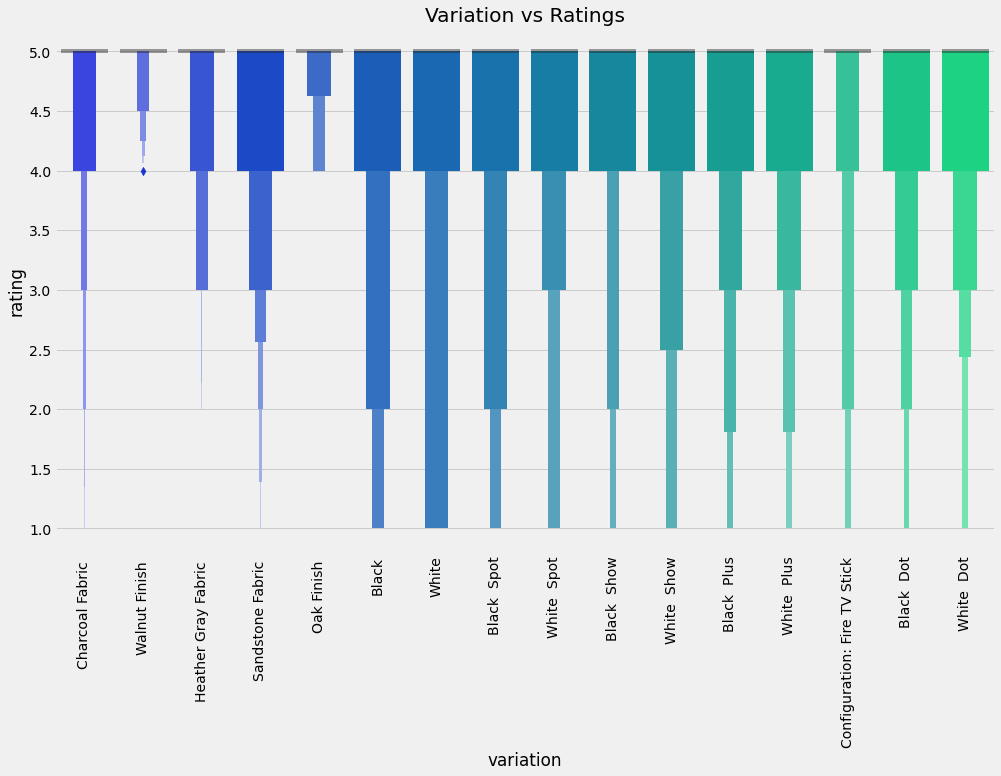

In [14]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.boxenplot(data['variation'], data['rating'], palette = 'winter')
plt.title("Variation vs Ratings")
plt.xticks(rotation = 90)
plt.show()

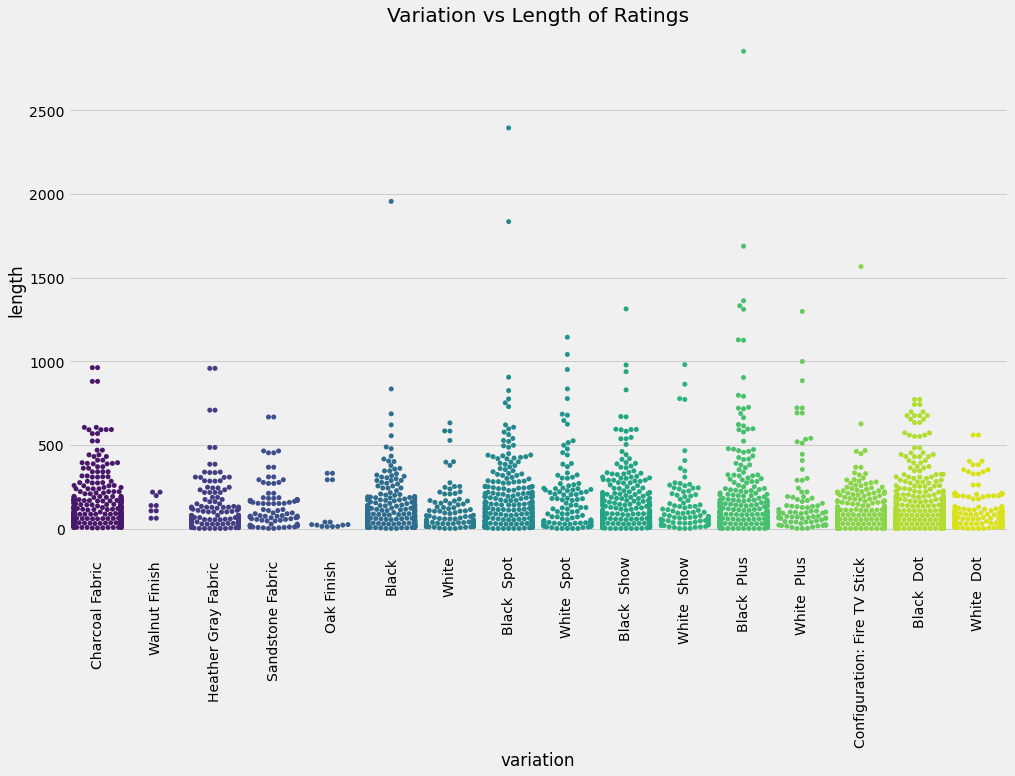

In [15]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.swarmplot(data['variation'], data['length'], palette = 'viridis')
plt.title("Variation vs Length of Ratings")
plt.xticks(rotation = 90)
plt.show()

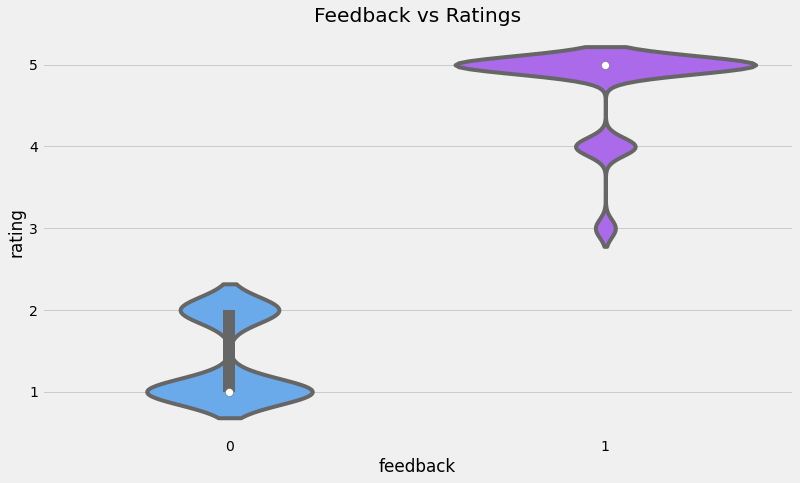

In [16]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.violinplot(data['feedback'], data['rating'], palette = 'cool')
plt.title("Feedback vs Ratings")
plt.show()

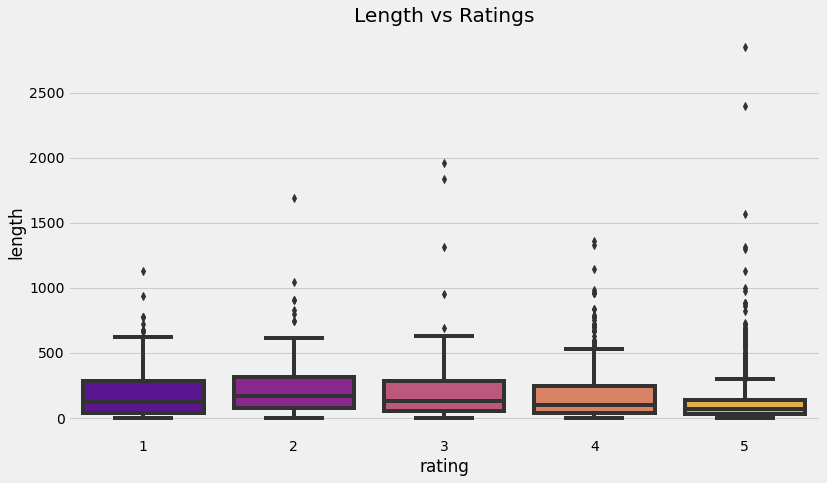

In [17]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.boxplot(data['rating'], data['length'], palette = 'plasma')
plt.title("Length vs Ratings")
plt.show()

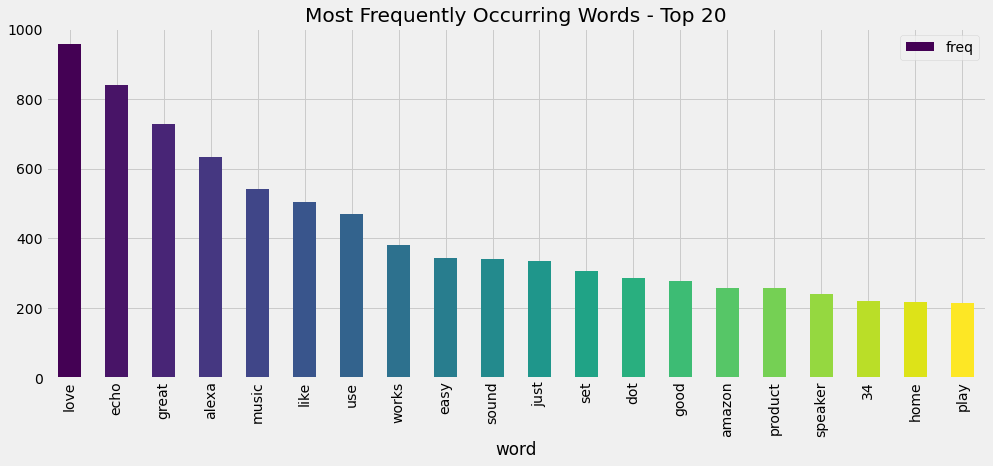

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.viridis(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occurring Words - Top 20")
plt.show()

In [20]:
# !pip install wordcloud

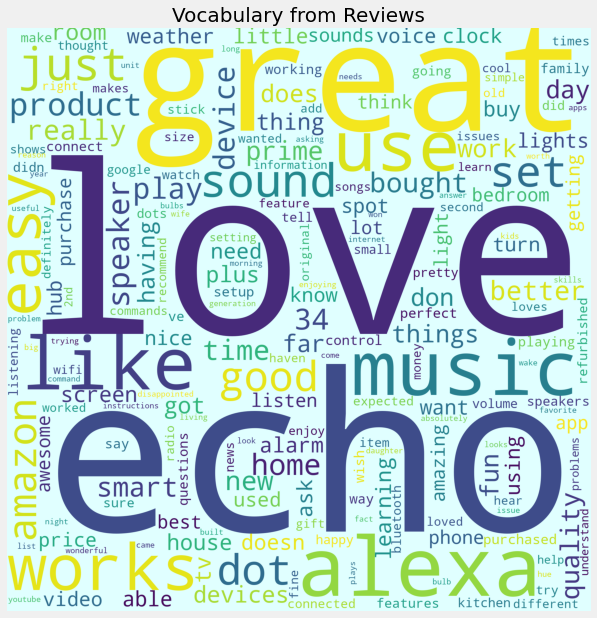

In [21]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

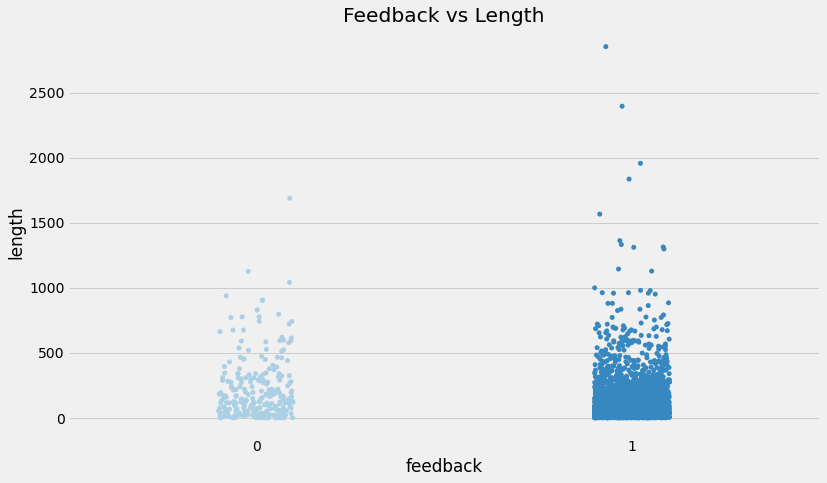

In [22]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.stripplot(data['feedback'], data['length'], palette = 'Blues')
plt.title("Feedback vs Length")
plt.show()

In [23]:
trace = go.Scatter3d(
    x = data['length'],
    y = data['rating'],
    z = data['variation'],
    name = 'Amazon Alexa',
    mode='markers',
    marker=dict(
        size=10,
        color = data['rating'],
        colorscale = 'viridis',))

df = [trace]
layout = go.Layout(
    title = 'Length vs Variation vs Ratings',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0))

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [25]:
# !pip install spacy

  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107102 sha256=2478c9e9eb928c5865ab560e6833dc746610fc0c4ae88636d064741d58c10822
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\11\73\9a\f91ac1f1816436b16423617c5be5db048697ff152a9c4346f2
Successfully built smart-open


In [44]:
# !pip install nltk

# !pip install spacy==2.3.5

# !pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

ERROR: en-core-web-lg 3.0.0 has requirement spacy<3.1.0,>=3.0.0, but you'll have spacy 2.3.5 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 存取被拒。: 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\~rsly\\msgpack\\_packer.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.1
    Uninstalling srsly-2.4.1:
      Successfully uninstalled srsly-2.4.1
  Using cached thinc-7.4.5-cp38-cp38-win_amd64.whl (910 kB)
  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047114 sha256=4dc890153f1dae6304a78bb554dc603192e9eb12432a93179ab74e841515d04a
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\ee\4d\f7\563214122be1540b5f9197b52cb3ddb9c4a8070808b22d5a84
Successfully built en-core-web-sm
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.4
    Uninstalling catalogue-2.0.4:
      Successfully uninstalled catalogue-2.0.4
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.4
    Uninstalling thinc-8.0.4:
      Successfully uninstalled thinc-8.0.4


ERROR: en-core-web-lg 3.0.0 has requirement spacy<3.1.0,>=3.0.0, but you'll have spacy 2.3.7 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 存取被拒。: 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\~hinc\\backends\\linalg.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [47]:
import spacy
nlp = spacy.load('en_core_web_sm')

# import en_core_web_sm
# nlp = en_core_web_sm.load()

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
        
for i in range(15, 50):
    one_sentence = data['verified_reviews'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent', jupyter=True)

OSError: [E053] Could not read config.cfg from C:\Users\user\anaconda3\lib\site-packages\en_core_web_sm\en_core_web_sm-2.2.0\config.cfg

In [35]:
# importing the libraries for Natural Language Processing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [36]:
# cleaning the text
corpus = []
for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [37]:
# creating bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

In [38]:
# splitting the dataset into Training and Test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [39]:
# Fitting Random Forest classifier with 100 trees to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [40]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [42]:
print(cm)
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 18  36]
 [  0 576]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        54
           1       0.94      1.00      0.97       576

    accuracy                           0.94       630
   macro avg       0.97      0.67      0.73       630
weighted avg       0.95      0.94      0.93       630

0.9428571428571428
